In [11]:
import get_price.get_futures_price as gfp
ticker = 'ESH2018'
date_to = 20180131
ticker_frame = gfp.get_futures_price_preloaded(ticker=ticker, settle_date_to=date_to)
ticker_frame['daily_range'] = ticker_frame['high_price']-ticker_frame['low_price']
ticker_frame['min_range'] = ticker_frame['daily_range'].rolling(window=7, center=False).min()

In [ ]:
# buying dips in ES instraday has a sharp ratio more than 2
# breakouts in energy products also seem to provide 2 or more sharp ratio

In [1]:
import contract_utilities.expiration as exp
date_list = exp.get_bus_day_list(date_from=20121231, date_to=20180131)
date_list.reverse()
date_list

[20180131,
 20180130,
 20180129,
 20180126,
 20180125,
 20180124,
 20180123,
 20180122,
 20180119,
 20180118,
 20180117,
 20180116,
 20180112,
 20180111,
 20180110,
 20180109,
 20180108,
 20180105,
 20180104,
 20180103,
 20180102,
 20171229,
 20171228,
 20171227,
 20171226,
 20171222,
 20171221,
 20171220,
 20171219,
 20171218,
 20171215,
 20171214,
 20171213,
 20171212,
 20171211,
 20171208,
 20171207,
 20171206,
 20171205,
 20171204,
 20171201,
 20171130,
 20171129,
 20171128,
 20171127,
 20171124,
 20171122,
 20171121,
 20171120,
 20171117,
 20171116,
 20171115,
 20171114,
 20171113,
 20171110,
 20171109,
 20171108,
 20171107,
 20171106,
 20171103,
 20171102,
 20171101,
 20171031,
 20171030,
 20171027,
 20171026,
 20171025,
 20171024,
 20171023,
 20171020,
 20171019,
 20171018,
 20171017,
 20171016,
 20171013,
 20171012,
 20171011,
 20171010,
 20171009,
 20171006,
 20171005,
 20171004,
 20171003,
 20171002,
 20170929,
 20170928,
 20170927,
 20170926,
 20170925,
 20170922,
 20170921,

In [ ]:
import backtesting.backtest_ibo as bibo
trades_frame_list = []

for i in range(len(date_list)):
    print(date_list[i])
    result_output = bibo.get_results_4date(date_to=date_list[i])
    trades_frame_list.append(result_output['trades_frame'])


20180131
20180130
20180129
20180126
20180125
20180124
20180123
20180122
20180119
20180118
20180117
20180116
20180112
20180111
20180110
20180109
20180108
20180105
20180104
20180103
20180102
20171229
20171228
20171227
20171226
20171222
20171221
20171220
20171219
20171218
20171215
20171214
20171213
20171212
20171211
20171208
20171207
20171206
20171205
20171204
20171201
20171130
20171129
20171128
20171127
20171124
20171122
20171121
20171120
20171117
20171116
20171115
20171114
20171113
20171110
20171109
20171108
20171107
20171106
20171103
20171102
20171101
20171031
20171030
20171027
20171026
20171025
20171024
20171023
20171020
20171019
20171018
20171017
20171016
20171013
20171012
20171011
20171010
20171009
20171006
20171005
20171004
20171003
20171002
20170929
20170928
20170927
20170926
20170925
20170922
20170921
20170920
20170919
20170918
20170915
20170914
20170913
20170912
20170911
20170908
20170907
20170906
20170905
20170901
20170831
20170830
20170829
20170828
20170825
20170824
20170823
2

In [3]:
import pandas as pd
trades_frame = pd.concat(trades_frame_list)
trades_frame['pnl_dollar'].sum()

-68535.58654652572

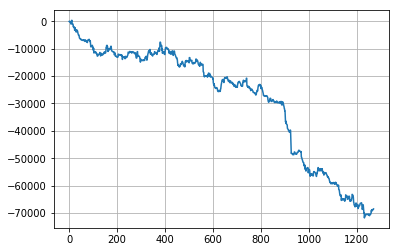

In [4]:
import matplotlib.pyplot as plt


plt.plot(range(len(trades_frame.index)),trades_frame['pnl_dollar'].cumsum())
plt.grid()         
         
plt.show()

In [12]:
trades_frame

,direction,entry_price,exit_price,entry_index,exit_index,pnl,pnl_dollar,normalized_stop_loss,pnl_normalized,trend,ticker_head,ticker,trade_date
0,1.0,2833.051205,2829.031496,0.0,77.0,-4.019709,-200.985438,0.535463,-0.311020,1,ES,ESH2018,20180131
0,1.0,6975.450000,6950.416667,0.0,77.0,-25.033333,-500.666667,0.371806,-0.589729,1,NQ,NQH2018,20180131
0,1.0,2826.102564,2824.019231,0.0,77.0,-2.083333,-104.166667,1.105527,-0.172297,-1,ES,ESH2018,20180130
0,1.0,6913.659091,6940.875000,1.0,77.0,27.215909,544.318182,0.868190,0.650341,-1,NQ,NQH2018,20180130
0,1.0,2864.553279,2853.653308,0.0,77.0,-10.899971,-544.998540,0.588107,-0.959245,1,ES,ESH2018,20180129
0,1.0,6992.775000,6992.333333,8.0,77.0,-0.441667,-8.833333,0.625668,-0.009636,1,NQ,NQH2018,20180129
0,1.0,2805.057123,2810.561284,0.0,77.0,5.504161,275.208067,0.321449,0.522746,1,ES,ESH2018,20180119
0,1.0,6829.777778,6845.388158,0.0,77.0,15.610380,312.207602,0.630059,0.369702,1,NQ,NQH2018,20180119
0,1.0,2800.087920,2796.154959,3.0,77.0,-3.932962,-196.648091,0.629199,-0.372102,1,ES,ESH2018,20180118
0,1.0,6810.200000,6812.250000,0.0,77.0,2.050000,41.000000,0.388641,0.048201,1,NQ,NQH2018,20180118


In [6]:
selected_frame = trades_frame[trades_frame['ticker_head']=='ES']
selected_frame['pnl_dollar'].mean()

18.826849020422543

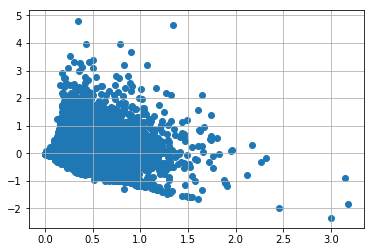

In [41]:
trades_frame = pd.concat(trades_frame_list)
selected_frame = trades_frame[~trades_frame['ticker_head'].isin(['TU', 'ED', 'FV', 'TY'])]
plt.scatter(selected_frame['normalized_stop_loss'],selected_frame['pnl_normalized'])
plt.grid()         
         
plt.show()

In [43]:
trades_frame = pd.concat(trades_frame_list)
selected_frame = trades_frame[~trades_frame['ticker_head'].isin(['TU', 'ED','FV','TY'])]
selected_frame = selected_frame[selected_frame['normalized_stop_loss']>0.5]
selected_frame['pnl_normalized'].mean()

-0.038628390017890035

In [39]:
trades_frame = pd.concat(trades_frame_list)
selected_frame = trades_frame[~trades_frame['ticker_head'].isin(['TU', 'ED'])]
weird_trades = selected_frame[(selected_frame['normalized_stop_loss']<0.5)&(selected_frame['pnl_normalized']<-0.7)]
weird_trades

,direction,entry_price,exit_price,entry_index,exit_index,pnl,pnl_dollar,normalized_stop_loss,pnl_normalized,trend,ticker_head,ticker,trade_date
0,-1.0,114.765653,114.859361,2.0,33.0,-0.093709,-93.708962,0.497211,-0.745980,-1,FV,FVH2018,20180129
0,-1.0,115.562880,115.654626,12.0,36.0,-0.091746,-91.745788,0.465285,-0.705635,-1,FV,FVH2018,20180111
0,-1.0,425.525362,428.478070,7.0,29.0,-2.952708,-147.635393,0.464183,-0.701895,1,W,WH2018,20171228
0,1.0,424.480769,421.555556,1.0,3.0,-2.925214,-146.260684,0.460968,-0.700406,-1,KW,KWH2018,20171226
0,-1.0,352.001859,354.187168,4.0,6.0,-2.185309,-109.265470,0.420122,-0.774562,1,C,CH2018,20171208
0,1.0,116.568527,116.476841,1.0,13.0,-0.091686,-91.685977,0.492969,-0.747871,-1,FV,FVH2018,20171130
0,-1.0,116.500010,116.585768,0.0,21.0,-0.085758,-85.757854,0.445205,-0.700446,-1,FV,FVH2018,20171129
0,-1.0,124.535300,124.699126,0.0,6.0,-0.163827,-163.826506,0.480366,-0.776664,-1,TY,TYZ2017,20171129
1,-1.0,124.535300,124.699126,12.0,21.0,-0.163827,-163.826506,0.480366,-0.776664,-1,TY,TYZ2017,20171129
0,-1.0,116.867264,116.952700,0.0,15.0,-0.085436,-85.436390,0.458537,-0.722982,1,FV,FVZ2017,20171127


In [5]:
# Patterns Based on Tickerhead?

trades_frame = pd.concat(trades_frame_list)
ticker_head_list = trades_frame['ticker_head'].unique()
long_pnl_list = []
short_pnl_list = []

for i in range(len(ticker_head_list)):
    selected_frame = trades_frame[trades_frame['ticker_head']==ticker_head_list[i]]
    long_frame = selected_frame[(selected_frame['direction']>0)&(selected_frame['trend']>0)]
    short_frame = selected_frame[(selected_frame['direction']<0)&(selected_frame['trend']<0)]
    long_pnl_list.append(long_frame['pnl_dollar'].mean())
    short_pnl_list.append(short_frame['pnl_dollar'].mean())
    
daily_frame = pd.DataFrame.from_items([('ticker_head', ticker_head_list),
                                            ('long_pnl',long_pnl_list),
                                            ('short_pnl',short_pnl_list)])  

daily_frame

,ticker_head,long_pnl,short_pnl
0,ED,-32.095160,-25.451318
1,C,-13.246434,-41.993650
2,SM,-136.278060,-23.941077
3,HO,-195.272091,59.853152
4,AD,-6.984493,-72.356501
5,EC,46.968900,-27.238875
6,FC,-301.333377,211.593779
7,GC,-174.766629,-12.600382
8,LC,-141.861456,143.787500
9,LN,65.140773,113.144326


In [38]:
selected_frame = trades_frame[trades_frame['ticker_head']=='CL']
long_frame = selected_frame[(selected_frame['direction']>0)&(selected_frame['trend']>0)&
                            (selected_frame['normalized_stop_loss']<0.5)]

16*long_frame['pnl_dollar'].mean()/long_frame['pnl_dollar'].std()

2.715177764427425

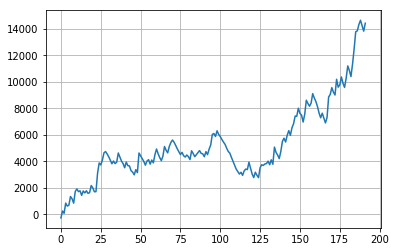

In [39]:
trades_frame = pd.concat(trades_frame_list)

selected_frame = trades_frame[trades_frame['ticker_head']=='CL']
long_frame = selected_frame[(selected_frame['direction']>0)&(selected_frame['trend']>0)&
                            (selected_frame['normalized_stop_loss']<0.5)]

plt.plot(range(len(long_frame.index)),long_frame['pnl_dollar'].cumsum())
plt.grid()         
         
plt.show()

In [6]:
import backtesting.backtest_ibo as bibo
results_output = bibo.get_results_4ticker(ticker='ESH2018',date_to = 20180130)
results_output['trades_frame']

,direction,entry_price,exit_price,entry_index,exit_index,pnl,pnl_dollar,normalized_stop_loss,pnl_normalized,trend,ticker_head,ticker,trade_date
0,1,2826.102564,2824.019231,0,77,-2.083333,-104.166667,1.105527,-0.172297,-1,ES,ESH2018,20180130


In [34]:
import shared.calendar_utilities as cu
cu.doubledate_shift(20180130,30)

20171231

In [31]:
import get_price.quantgo_data as qd
date_to = 20180130
ticker = 'LCJ2018'
candle_frame = qd.get_continuous_bar_data(ticker='LCJ2018', date_to=date_to, num_days_back=20)
candle_frame['ma100'] = candle_frame['close'].rolling(window=100, center=False).mean()
candle_frame['ma50'] = candle_frame['close'].rolling(window=50, center=False).mean()
candle_frame['ma5'] = candle_frame['close'].rolling(window=5, center=False).mean()

In [4]:
import get_price.get_futures_price as gfp
ticker = 'LCJ2018'
date_to = 20180131
daily_frame = gfp.get_futures_price_preloaded(ticker=ticker, settle_date_to=date_to)


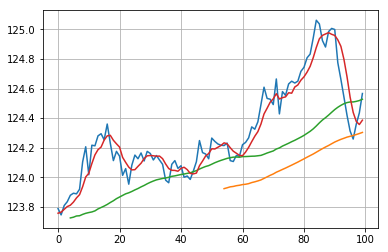

In [32]:
import matplotlib.pyplot as plt
select_frame = candle_frame[-1000:-900]
plt.plot(range(len(select_frame.index)),select_frame['close'],
         range(len(select_frame.index)),select_frame['ma100'],
         range(len(select_frame.index)),select_frame['ma50'],
         range(len(select_frame.index)),select_frame['ma5'])
plt.grid()         
         
plt.show()

In [33]:
candle_frame

,open,high,low,close,buy_volume,sell_volume,volume,hour_minute,ma100,ma50,ma5
2018-01-02 08:30:00,123.012500,123.708333,122.950000,123.650000,237.0,152.0,199.0,830,NaN,NaN,NaN
2018-01-02 08:35:00,123.633333,123.666667,123.241667,123.475000,101.0,66.0,34.0,835,NaN,NaN,NaN
2018-01-02 08:40:00,123.608333,123.896875,123.562500,123.837500,109.0,44.0,21.0,840,NaN,NaN,NaN
2018-01-02 08:45:00,123.837500,123.942857,123.643750,123.643750,32.0,45.0,10.0,845,NaN,NaN,NaN
2018-01-02 08:50:00,123.643750,123.937500,123.637500,123.841667,50.0,20.0,20.0,850,NaN,NaN,123.689583
2018-01-02 08:55:00,123.841667,123.962500,123.758333,123.762500,45.0,27.0,11.0,855,NaN,NaN,123.712083
2018-01-02 09:00:00,123.791667,124.041667,123.787500,124.012500,69.0,28.0,23.0,900,NaN,NaN,123.819583
2018-01-02 09:05:00,124.014286,124.137500,123.850000,123.850000,32.0,96.0,45.0,905,NaN,NaN,123.822083
2018-01-02 09:10:00,123.850000,123.898485,123.518750,123.616667,41.0,154.0,73.0,910,NaN,NaN,123.816667
2018-01-02 09:15:00,123.616667,123.866667,123.616667,123.812500,31.0,35.0,70.0,915,NaN,NaN,123.810833


In [ ]:
import get_price.get_futures_price as gfp

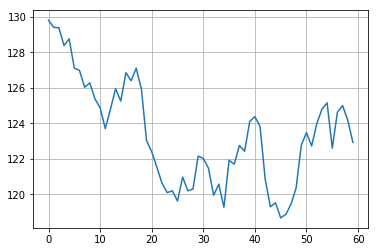

In [10]:
select_frame = daily_frame[-60:]
import matplotlib.pyplot as plt
plt.plot(range(len(select_frame.index)),select_frame['close_price'])
plt.grid()         
         
plt.show()